# WORLD CUP DATA SET ANALYSIS

In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('G:/WORLD_CUP_data')
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

import re

In [261]:
data=pd.read_csv('WorldCup.csv')
data

,Team1,Continent1,Rank1,num_champs_1,IsHost1,Team2,Continent2,Rank2,num_champs_2,IsHost2,result,result_int,world_cup,MATCH,Group
0,England',Europe',5,1,0,Tunisia',Africa',21,0,0,2-0',0,1998,1,G
1,Brazil',South_America',1,4,0,'Scotland',Europe',41,0,0,2-1',0,1998,1,A
2,Germany',Europe',2,3,0,USA',Concacaf',11,0,0,2-0',0,1998,1,F
3,Mexico',Concacaf',4,0,0,South_Korea',Asia',20,0,0,3-1',0,1998,1,E
4,USA',Concacaf',11,0,0,Iran',Asia',42,0,0,1-2',2,1998,2,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Columbia',South_America',16,0,0,Senegal',Africa',27,0,0,1-0',0,2018,3,H
284,Columbia',South_America',16,0,0,Japan',Asia',61,0,0,1-2',2,2018,1,H
285,Poland',Europe',8,0,0,Senegal',Africa',27,0,0,1-2',2,2018,1,H
286,Poland',Europe',8,0,0,Japan',Asia',61,0,0,1-0',0,2018,3,H


## The group of deaths determination.
## Our criterion for determination of group of deaths is the summation of group members' rankings

In [262]:
data_ch=data[['Rank1','Rank2','world_cup','Group']]
data_grouped=data_ch.groupby(by=['world_cup','Group']).mean()
data_ch_visualization=data_ch.copy()
data_ch_visualization['Ranks']=0.5*(data_ch['Rank1']+data_ch['Rank2'])
#data2.head()
print(data[(data.Group=='G') & (data.world_cup==1998)])
ranksss=np.array([5,22,21,10])
print(ranksss.mean())

        Team1      Continent1  Rank1  num_champs_1  IsHost1      Team2  \
0    England'         Europe'      5             1        0   Tunisia'   
24   Romania'         Europe'     22             0        0  Colombia'   
36   Tunisia'         Africa'     21             0        0   Romania'   
37  Colombia'  South_America'     10             0        0   England'   
38  Colombia'  South_America'     10             0        0   Tunisia'   
39   England'         Europe'      5             1        0   Romania'   

        Continent2  Rank2  num_champs_2  IsHost2 result  result_int  \
0          Africa'     21             0        0   2-0'           0   
24  South_America'     10             0        0   1-0'           0   
36         Europe'     22             0        0   1-1'           1   
37         Europe'      5             1        0   0-2'           2   
38         Africa'     21             0        0   1-0'           0   
39         Europe'     22             0        0   1-2'

In [263]:
data_ch_cis=data_ch_visualization[data_ch_visualization.world_cup==1998]
data_ch_cis=data_ch_cis.sort_values('Group')
data_ch_visualization.iloc[0:48,:]=data_ch_cis

<Figure size 720x576 with 0 Axes>

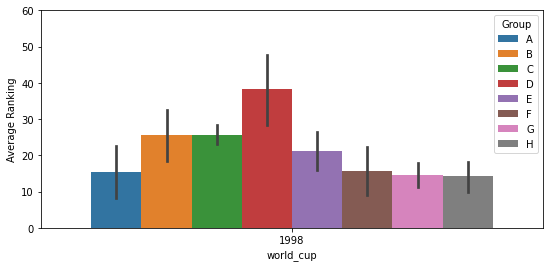

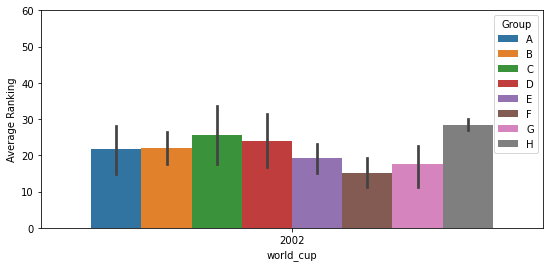

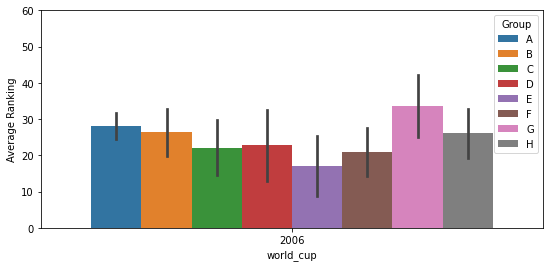

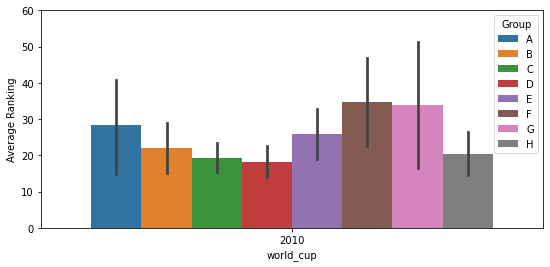

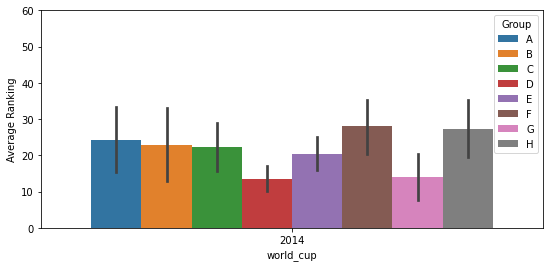

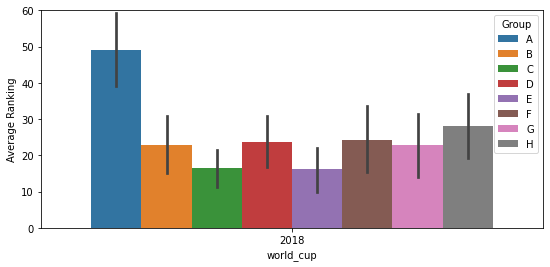

In [264]:
#print(data_#grouped.world_cup)
#sns.barplot(x = ('world_cup',),y='average_ranks',data=data_grouped)
plt.figure(figsize=(10,8))
for i in [1998,2002,2006,2010,2014,2018]:
    plt.figure(figsize=(9,4))
    sns.barplot(x='world_cup', y='Ranks', hue='Group', data=data_ch_visualization[data_ch_visualization.world_cup==i])
    plt.ylabel('Average Ranking')
    plt.ylim([0,60])


In [265]:
data_grouped['average_ranks']=0.5*(data_grouped['Rank1']+data_grouped['Rank2'])

dict={1:1998,2:2002,3:2006,4:2010,5:2014,6:2018}
ind=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
death_group={}
death_group_year={}
for i in range(1,7):
   death_group[dict[i]]=data_grouped.loc[(dict[i],),'average_ranks']==data_grouped.loc[(dict[i],),'average_ranks'].min()
for i in range(1,7):
    for j in range(0,8):
        if death_group[dict[i]].iloc[j]==True:
            death_group_year[dict[i]]=ind[j]
            teams1=data[(data.Group=='E') & (data.world_cup==1998)][['Team1']]
            teams2=data[(data.Group=='E') & (data.world_cup==1998)][['Team2']]
            
            

In [266]:
death_group_year
for k,s in death_group_year.items():
    print('The death group in',str(k), 'is:',s)
    ds=data[(data.Group==s) & (data.world_cup==k)][['Team1','Team2']]
    datas=pd.concat([ds.Team1,ds.Team2])
    print('the group teams were',datas.unique())
    
    

The death group in 1998 is: H
the group teams were ["Japan'" "Argentina'" "Croatia'" "Jamaica'"]
The death group in 2002 is: F
the group teams were ["Argentina'" "England'" "Nigeria'" "Sweden'"]
The death group in 2006 is: E
the group teams were ["Italy'" "Ghana'" "Czechia'" "USA'"]
The death group in 2010 is: D
the group teams were ["Germany'" "Australia'" "Ghana'" "Serbia'"]
The death group in 2014 is: D
the group teams were ["Uruguay'" "Costa_Rica'" "Italy'" "England'"]
The death group in 2018 is: E
the group teams were ["Brazil'" "Costa_Rica'" "Serbia'" "Switzerland'"]


In [267]:
dict={1:1998,2:2002,3:2006,4:2010,5:2014,6:2018}
ind=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
easy_group={}
easy_group_year={}
for i in range(1,7):
   easy_group[dict[i]]=data_grouped.loc[(dict[i],),'average_ranks']==data_grouped.loc[(dict[i],),'average_ranks'].max()
for i in range(1,7):
    for j in range(0,8):
        if easy_group[dict[i]].iloc[j]==True:
            easy_group_year[dict[i]]=ind[j]
            teams1=data[(data.Group=='E') & (data.world_cup==1998)][['Team1']]
            teams2=data[(data.Group=='E') & (data.world_cup==1998)][['Team2']]
easy_group_year
for k,s in easy_group_year.items():
    print('The easiest group in',str(k), 'is:',s)
    ds=data[(data.Group==s) & (data.world_cup==k)][['Team1','Team2']]
    datas=pd.concat([ds.Team1,ds.Team2])
    print('the group teams were',datas.unique())



The easiest group in 1998 is: D
the group teams were ["Spain'" "Paraguay'" "Bulgaria'" "Nigeria'"]
The easiest group in 2002 is: H
the group teams were ["Japan'" "Belgium'" "Tunisia'" "Russia'"]
The easiest group in 2006 is: G
the group teams were ["Switzerland'" "South_Korea'" "France'" "Togo'"]
The easiest group in 2010 is: F
the group teams were ["Italy'" "Paraguay'" "New_Zealand'" "Slovakia'"]
The easiest group in 2014 is: F
the group teams were ["Argentina'" "Bosnia'" "Iran'" "Nigeria'"]
The easiest group in 2018 is: A
the group teams were ["Uruguay'" "Russia'" "Saudi_Arabia'" "Egypt'"]


In [268]:
X_winers=[]
X_losers=[]
X_draws=[]
j=0
# for loop to collect the winners in all the games
for i in range(288):
    if data.iloc[i,11]==0:
        
        xa=list(data.iloc[i,[0,1,2,3,4,12]].values)
        if re.split("\'", xa[0])[0]=='':
            xa[0]=re.split("\'", xa[0])[1]
        else:
            xa[0]=re.split("\'", xa[0])[0]

        if re.split("\'", xa[1])[0]=='':
            xa[1]=re.split("\'", xa[1])[1]
        else:
            xa[1]=re.split("\'", xa[1])[0]

        xb=list(data.iloc[i,[5,6,7,8,9,12]].values)
        if re.split("\'", xb[0])[0]=='':
            xb[0]=re.split("\'", xb[0])[1]
        else:
            xb[0]=re.split("\'", xb[0])[0]

        if re.split("\'", xb[1])[0]=='':
            xb[1]=re.split("\'", xb[1])[1]
        else:
            xb[1]=re.split("\'", xb[1])[0]

        X_winers.append(xa)
        X_losers.append(xb)
    elif data.iloc[i,11]==2:
        xa=list(data.iloc[i,[5,6,7,8,9,12]].values)
        if re.split("\'", xa[0])[0]=='':
            xa[0]=re.split("\'", xa[0])[1]
        else:
            xa[0]=re.split("\'", xa[0])[0]

        if re.split("\'", xa[1])[0]=='':
            xa[1]=re.split("\'", xa[1])[1]
        else:
            xa[1]=re.split("\'", xa[1])[0]

        
        xb=list(data.iloc[i,[0,1,2,3,4,12]].values)
        if re.split("\'", xb[0])[0]=='':
            xb[0]=re.split("\'", xb[0])[1]
        else:
            xb[0]=re.split("\'", xb[0])[0]

        if re.split("\'", xb[1])[0]=='':
            xb[1]=re.split("\'", xb[1])[1]
        else:
            xb[1]=re.split("\'", xb[1])[0]
    else:
        xd1=list(data.iloc[i,[5,6,7,8,9,12]].values)
        if re.split("\'", xd1[0])[0]=='':
            xd1[0]=re.split("\'", xd1[0])[1]
        else:
            xd1[0]=re.split("\'", xd1[0])[0]

        if re.split("\'", xd1[1])[0]=='':
            xd1[1]=re.split("\'", xd1[1])[1]
        else:
            xd1[1]=re.split("\'", xd1[1])[0]

        
        xd2=list(data.iloc[i,[0,1,2,3,4,12]].values)
        if re.split("\'", xd2[0])[0]=='':
            xd2[0]=re.split("\'", xd2[0])[1]
        else:
            xd2[0]=re.split("\'", xd2[0])[0]

        if re.split("\'", xd2[1])[0]=='':
            xd2[1]=re.split("\'", xd2[1])[1]
        else:
            xd2[1]=re.split("\'", xd2[1])[0]

        
        X_winers.append(xa)
        X_losers.append(xb)
        X_draws.append(xd1)
        X_draws.append(xd2)
WINS=pd.DataFrame(X_winers)
WINS.columns=['Country','Continent','Ranking','Num_Chapionships','IsHost','Year']
LOSES=pd.DataFrame(X_losers)
LOSES.columns=['Country','Continent','Ranking','Num_Chapionships','IsHost','Year']
DRAWS=pd.DataFrame(X_draws)
DRAWS.columns=['Country','Continent','Ranking','Num_Chapionships','IsHost','Year']
WINS['Points']=3
LOSES['Points']=0
DRAWS['Points']=1
data.head()

,Team1,Continent1,Rank1,num_champs_1,IsHost1,Team2,Continent2,Rank2,num_champs_2,IsHost2,result,result_int,world_cup,MATCH,Group
0,England',Europe',5,1,0,Tunisia',Africa',21,0,0,2-0',0,1998,1,G
1,Brazil',South_America',1,4,0,'Scotland',Europe',41,0,0,2-1',0,1998,1,A
2,Germany',Europe',2,3,0,USA',Concacaf',11,0,0,2-0',0,1998,1,F
3,Mexico',Concacaf',4,0,0,South_Korea',Asia',20,0,0,3-1',0,1998,1,E
4,USA',Concacaf',11,0,0,Iran',Asia',42,0,0,1-2',2,1998,2,F


loses Europe           70
Africa           55
Asia             44
South_America    28
Concacaf         24
Name: Continent, dtype: int64
wins Europe           127
South_America     42
Africa            19
Asia              18
Concacaf          15
Name: Continent, dtype: int64
draws Europe           67
Africa           26
South_America    20
Asia             17
Concacaf         15
Oceania           3
Name: Continent, dtype: int64


<AxesSubplot:xlabel='Continent', ylabel='Points'>

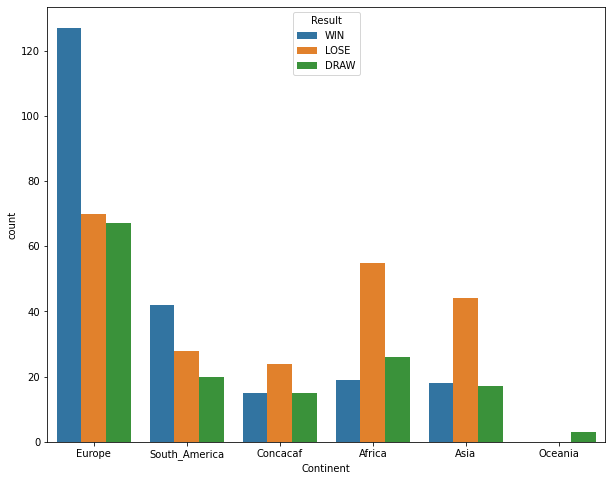

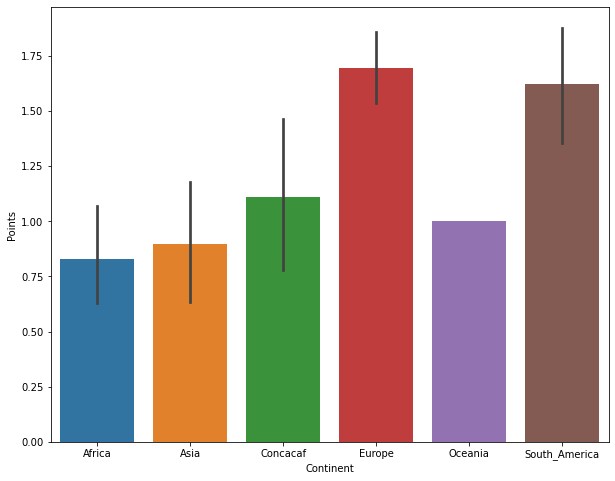

In [269]:
print('loses',LOSES['Continent'].value_counts())
print('wins',WINS['Continent'].value_counts())
print('draws',DRAWS['Continent'].value_counts())

WINS['Result']='WIN'
LOSES['Result']='LOSE'
DRAWS['Result']='DRAW'
all_result=pd.concat([WINS,LOSES,DRAWS],ignore_index=True)
plt.figure(figsize=(10,8))

sns.countplot(x='Continent',hue='Result',data=all_result)
plt.figure(figsize=(10,8))
df_sorted_ii = all_result.sort_values(['Continent'])
sns.barplot(x='Continent',y='Points',data=df_sorted_ii)


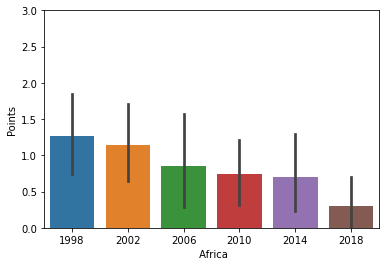

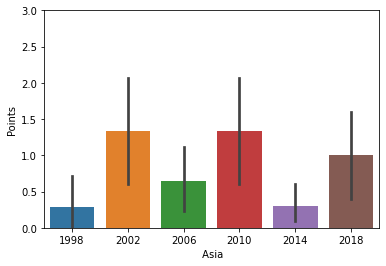

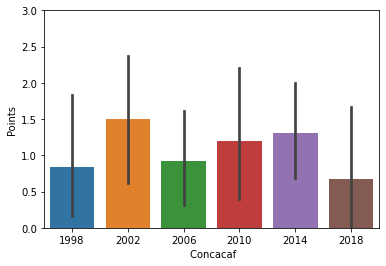

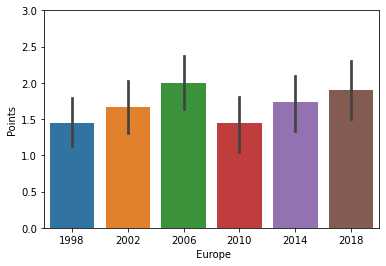

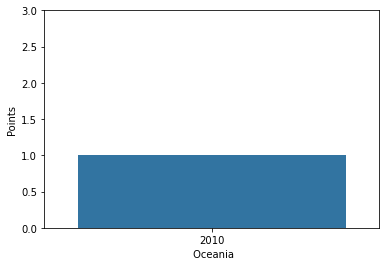

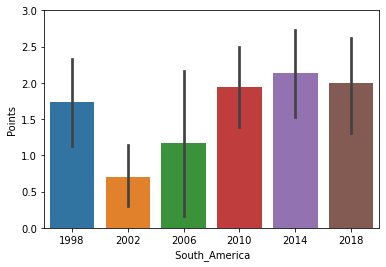

In [270]:
df_sorted = all_result.sort_values(['Continent','Result'])
for i in ['Africa', 'Asia', 'Concacaf', 'Europe', 'Oceania', 'South_America']:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Year',y='Points',data=df_sorted[df_sorted.Continent==i])
    plt.xlabel(' {}'.format(i))
    plt.ylim([0,3])

,Country,Continent,Ranking,Num_Chapionships,IsHost,Year,Points,Result
0,England,Europe,5,1,0,1998,3,WIN
1,Brazil,South_America,1,4,0,1998,3,WIN
2,Germany,Europe,2,3,0,1998,3,WIN
3,Mexico,Concacaf,4,0,0,1998,3,WIN
4,Nigeria,Africa,74,0,0,1998,3,WIN
...,...,...,...,...,...,...,...,...
585,Brazil,South_America,2,5,0,2018,1,DRAW
586,Switzerland,Europe,6,0,0,2018,1,DRAW
587,Costa_Rica,Concacaf,23,0,0,2018,1,DRAW
588,Japan,Asia,61,0,0,2018,1,DRAW


In [271]:
X_all=[]
y_all=[]
j=0
# for loop to collect the winners in all the games
for i in range(188):
    
    xa=list(data.iloc[i,[1,2,3,4,6,7,8,9]].values)
    xa[0]=re.split("\'", xa[0])[0]
    xa[4]=re.split("\'", xa[4])[0]

    X_all.append(xa)
    y_all.append(data.iloc[i,11])
    
for i in range(188):
    xa=list(data.iloc[i,[6,7,8,9,1,2,3,4]].values)
    xa[0]=re.split("\'", xa[0])[0]
    xa[4]=re.split("\'", xa[4])[0]
    X_all.append(xa)
    y_all.append(2-data.iloc[i,11])

# Feature Selection 

# Effect of contries and continents on the wins, loses, and draws

<AxesSubplot:xlabel='Result', ylabel='Country'>

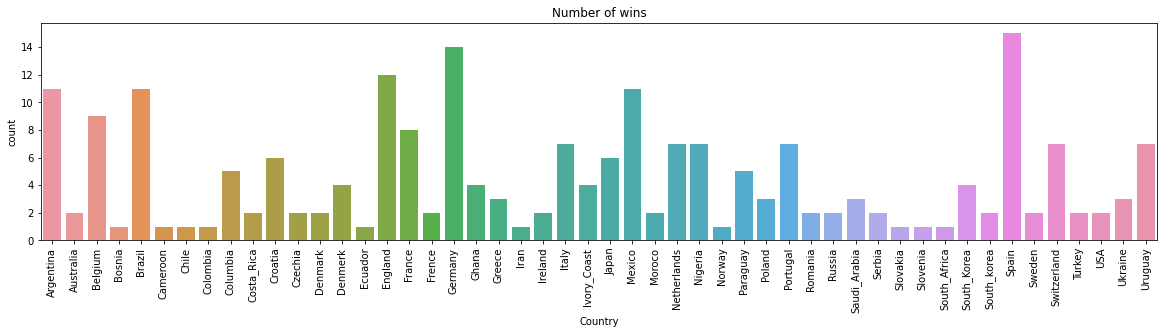

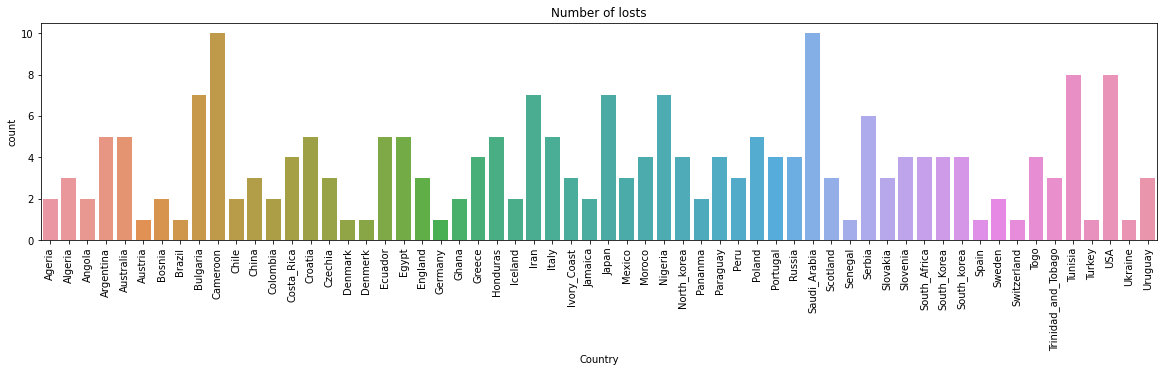

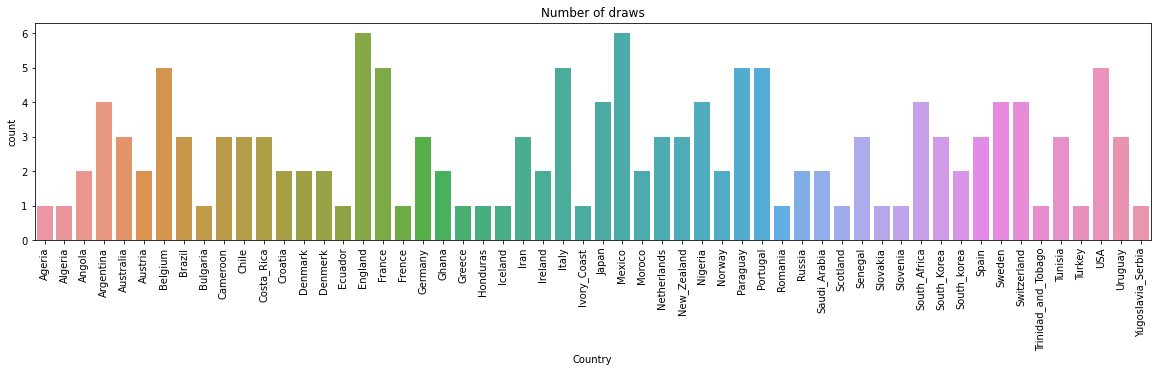

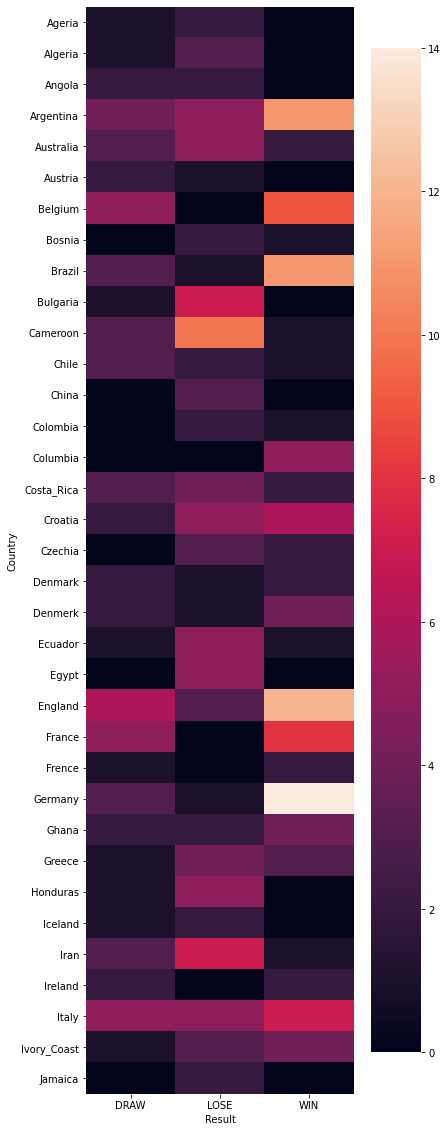

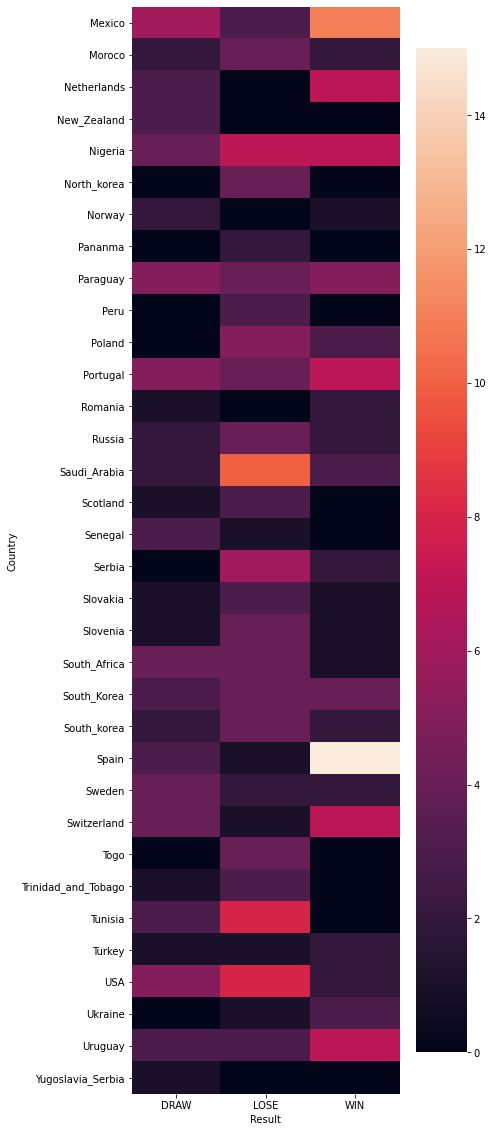

In [272]:
df_sorted_2=all_result.sort_values(['Country'])
plt.figure(figsize=(20,4))
sns.countplot(x='Country',data=df_sorted_2[df_sorted_2.Result=='WIN'])
plt.title('Number of wins')
plt.xticks(rotation='vertical')

plt.figure(figsize=(20,4))

sns.countplot(x='Country',data=df_sorted_2[df_sorted_2.Result=='LOSE'])
plt.title('Number of losts')
plt.xticks(rotation='vertical')
plt.figure(figsize=(20,4))

sns.countplot(x='Country',data=df_sorted_2[df_sorted_2.Result=='DRAW'])
plt.title('Number of draws')
plt.xticks(rotation='vertical')

all_result.head()
a=pd.crosstab(df_sorted_2.Country,df_sorted_2.Result)
plt.figure(figsize=(6,20))
sns.heatmap(a.iloc[0:35])
plt.figure(figsize=(6,20))
sns.heatmap(a.iloc[36:])

In [178]:
print(a)
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(a)
print('p values are:',p)
if p>0.05:
    print('null hypothesis (Country and Result are independent) is not rejected')
if p<0.05:
    print('null hypothesis (Country and Result are independent) is rejected')

Result             DRAW  LOSE  WIN
Country                           
Ageria                1     2    0
Algeria               1     3    0
Angola                2     2    0
Argentina             4     5   11
Australia             3     5    2
...                 ...   ...  ...
Turkey                1     1    2
USA                   5     8    2
Ukraine               0     1    3
Uruguay               3     3    7
Yugoslavia_Serbia     1     0    0

[70 rows x 3 columns]
p values are: 1.9992464273360716e-09
null hypothesis (Country and Result are independent) is rejected


# perform a chi2 test for the effect of continents on the performance

In [179]:
b=pd.crosstab(df_sorted_2.Continent,df_sorted_2.Result)
plt.figure(figsize=(6,20))
#sns.heatmap(b)
c, p, dof, expected = chi2_contingency(b)
print('p values are:',p)
if p>0.05:
    print('null hypothesis (Continents and Result are independent) is not rejected')
if p<0.05:
    print('null hypothesis (Continents and Result are independent) is rejected')


p values are: 3.3071101797778935e-09
null hypothesis (Continents and Result are independent) is rejected


<Figure size 432x1440 with 0 Axes>

In [180]:
c_c=pd.crosstab(df_sorted_2.IsHost,df_sorted_2.Result)
plt.figure(figsize=(6,20))
#sns.heatmap(b)
c, p, dof, expected = chi2_contingency(c_c)
print('p values are:',p)
if p>0.05:
    print('null hypothesis (Continents and Result are independent) is not rejected')
if p<0.05:
    print('null hypothesis (Continents and Result are independent) is rejected')


p values are: 0.020961808237371142
null hypothesis (Continents and Result are independent) is rejected


<Figure size 432x1440 with 0 Axes>

28.279878251157292
1.881251331975169e-12
13.514749247482536
1.8270149133118786e-06


<AxesSubplot:xlabel='Result', ylabel='Num_Chapionships'>

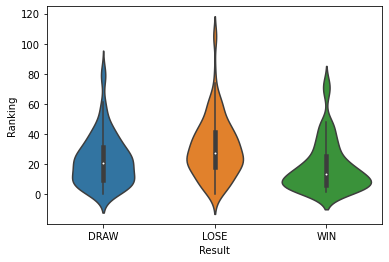

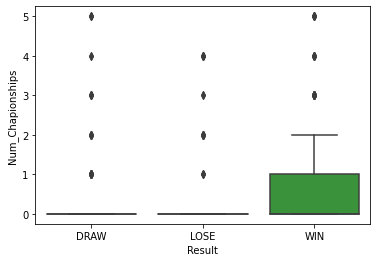

In [181]:
from scipy.stats import f_oneway
F,p=f_oneway(df_sorted_2.Ranking[df_sorted_2.Result=='WIN'],df_sorted_2.Ranking[df_sorted_2.Result=='LOSE'],df_sorted_2.Ranking[df_sorted_2.Result=='DRAW'])

print(F)
print(p)
F,p=f_oneway(df_sorted_2.Num_Chapionships[df_sorted_2.Result=='WIN'],df_sorted_2.Num_Chapionships[df_sorted_2.Result=='LOSE'],df_sorted_2.Num_Chapionships[df_sorted_2.Result=='DRAW'])
print(F)
print(p)
plt.figure(figsize=(6,4))
sns.violinplot(x='Result',y='Ranking',data=df_sorted_2)
plt.figure(figsize=(6,4))
sns.boxplot(x='Result',y='Num_Chapionships',data=df_sorted_2)

# Prediction using only fifa ranking, number of championship and whether they are the host

# Adding the continents into predictions

In [273]:
X_all=[]
y_all=[]
for i in range(188):
    xa=list(data.iloc[i,[1,2,3,4,6,7,8,9]].values)
    xa[0]=re.split("\'", xa[0])[0]
    xa[4]=re.split("\'", xa[4])[0]

    X_all.append(xa)
    y_all.append(data.iloc[i,11])
    
for i in range(188):
    xa=list(data.iloc[i,[6,7,8,9,1,2,3,4]].values)
    xa[0]=re.split("\'", xa[0])[0]
    xa[4]=re.split("\'", xa[4])[0]
    X_all.append(xa)
    y_all.append(2-data.iloc[i,11])


In [275]:
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[0,4]),('minmax',MinMaxScaler(),[1,2,5,6])],remainder='passthrough')

In [276]:
X_all_t=ct.fit_transform(X_all)
Xtrain,Xtest,y_train,y_test=train_test_split(X_all_t,y_all,random_state=42,test_size=0.2)
Xtrain.shape

(300, 18)

In [186]:
n_estimators = [50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(40, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
LR=RandomForestClassifier()

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = LR,param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(Xtrain,y_train)
rf_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(max_depth=54, min_samples_split=10)

In [277]:
LR=RandomForestClassifier(bootstrap=False, max_depth=54, max_features='sqrt',min_samples_split=10, n_estimators=50)
LR.fit(Xtrain,y_train)
y_p=LR.predict(Xtest)
y_p_training_data=LR.predict(Xtrain)
print('f1 score is',f1_score(y_test,y_p,average='weighted'))
print('accuracy score is',accuracy_score(y_test,y_p))
print('f1 score is',f1_score(y_train,y_p_training_data,average='weighted'))
print('accuracy score is',accuracy_score(y_train,y_p_training_data))


f1 score is 0.5386548138555275
accuracy score is 0.5394736842105263
f1 score is 0.9061362837432818
accuracy score is 0.9066666666666666


In [112]:
from keras.models import Model
from keras.layers import Dense,Input
from tensorflow.keras.utils import to_categorical


import tensorflow as tf
inp=Input(shape=(18,))
x=Dense(20,activation='relu')(inp)
x=Dense(20,activation='relu')(x)
x=Dense(3,activation='softmax')(x)
model=Model(inputs=inp,outputs=x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
data_set = tf.data.Dataset.from_tensor_slices(  (np.asarray(Xtrain).astype('float32'),np.asarray(y_train).astype('float32')))
#r=model.fit(data_set)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
r=model.fit(np.asarray(Xtrain).astype('float32'),y_train,validation_data=(np.asarray(Xtest).astype('float32'),y_test),epochs=40,batch_size=32)

Epoch 1/40
10/10 [==============================] - 1s 36ms/step - loss: 1.0990 - accuracy: 0.3600 - val_loss: 1.0951 - val_accuracy: 0.3421
Epoch 2/40
10/10 [==============================] - 0s 5ms/step - loss: 1.0906 - accuracy: 0.3800 - val_loss: 1.0905 - val_accuracy: 0.3421
Epoch 3/40
10/10 [==============================] - 0s 5ms/step - loss: 1.0845 - accuracy: 0.3967 - val_loss: 1.0863 - val_accuracy: 0.3553
Epoch 4/40
10/10 [==============================] - 0s 5ms/step - loss: 1.0788 - accuracy: 0.4133 - val_loss: 1.0839 - val_accuracy: 0.3553
Epoch 5/40
10/10 [==============================] - 0s 7ms/step - loss: 1.0738 - accuracy: 0.3933 - val_loss: 1.0812 - val_accuracy: 0.3947
Epoch 6/40
10/10 [==============================] - 0s 7ms/step - loss: 1.0691 - accuracy: 0.4033 - val_loss: 1.0774 - val_accuracy: 0.4079
Epoch 7/40
10/10 [==============================] - 0s 6ms/step - loss: 1.0635 - accuracy: 0.4467 - val_loss: 1.0746 - val_accuracy: 0.4211
Epoch 8/40
10/10 [=

In [115]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Adding the name of countries into predictions

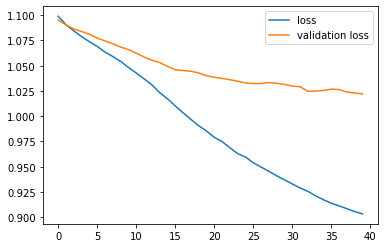

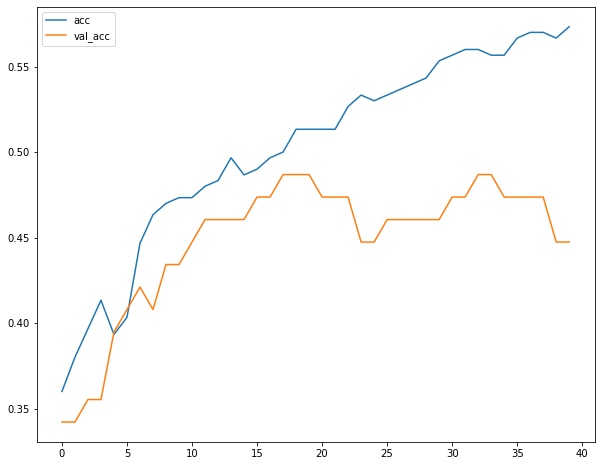

In [116]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
plt.figure(figsize=(10,8))
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [160]:
X_all_t=[]
y_all_t=[]
for i in range(188):
    xa=list(data.iloc[i,[0,1,2,3,4,5,6,7,8,9]].values)
    xa[0]=re.split("\'", xa[0])[0]
    xa[5]=re.split("\'", xa[5])[0]
    xa[1]=re.split("\'", xa[1])[0]
    xa[6]=re.split("\'", xa[6])[0]

    X_all_t.append(xa)
    y_all_t.append(data.iloc[i,11])
    
for i in range(188):
    xa=list(data.iloc[i,[5,6,7,8,9,0,1,2,3,4]].values)
    xa[0]=re.split("\'", xa[0])[0]
    xa[5]=re.split("\'", xa[5])[0]
    xa[1]=re.split("\'", xa[1])[0]
    xa[6]=re.split("\'", xa[6])[0]
    X_all_t.append(xa)
    y_all_t.append(2-data.iloc[i,11])


In [161]:
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[0,1,5,6]),('minmax',MinMaxScaler(),[2,3,7,8])],remainder='passthrough')

In [162]:
X_all_transformed=ct.fit_transform(X_all_t)
Xtrain,Xtest,y_train,y_test=train_test_split(X_all_transformed,y_all,random_state=42,test_size=0.2)

n_estimators = [50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(40, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
LR=RandomForestClassifier()

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = LR,param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(Xtrain,y_train)
rf_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(max_depth=120, min_samples_leaf=4, n_estimators=50)

In [164]:
LR=RandomForestClassifier(max_depth=120, min_samples_leaf=4, n_estimators=50)
LR.fit(Xtrain,y_train)
y_p=LR.predict(Xtest)
y_p_training_data=LR.predict(Xtrain)
print('f1 score is',f1_score(y_test,y_p,average='weighted'))
print('accuracy score is',accuracy_score(y_test,y_p))
print('f1 score is',f1_score(y_train,y_p_training_data,average='weighted'))
print('accuracy score is',accuracy_score(y_train,y_p_training_data))

f1 score is 0.40320854218880536
accuracy score is 0.4473684210526316
f1 score is 0.5738822406231094
accuracy score is 0.61


In [189]:
n_estimators = [50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(40, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = LR,param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(Xtrain,y_train)
rf_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(bootstrap=False, max_depth=83, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50)

In [29]:
print('f1 score is',f1_score(y_test,y_p,average='weighted'))
print('accuracy score is',accuracy_score(y_test,y_p))

f1 score is 0.4398819971165298
accuracy score is 0.4342105263157895


In [30]:
LR_fitted=RandomForestClassifier(max_depth=105, max_features='sqrt', min_samples_leaf=4,  min_samples_split=6)
LR_fitted.fit(Xtrain,y_train)
y_p=LR_fitted.predict(Xtest)
print('f1 score is',f1_score(y_test,y_p,average='weighted'))
print('accuracy score is',accuracy_score(y_test,y_p))

f1 score is 0.4143349827560354
accuracy score is 0.4473684210526316


In [191]:
Groups=pd.DataFrame({'A': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],'B': ['England', 'Iran', 'USA', 'Wales'],'C': ['Argentina', 'Saudi_Arabia', 'Mexico', 'Poland'],'D': ['France', 'Australia', 'Denmark', 'Tunisia'],'E': ['Spain', 'Costa-Rica', 'Germany', 'Japan'],'F': ['Belgium', 'Canada', 'Morocco', 'Croatia'],'G': ['Brazil', 'Serbia', 'Switzerland', 'Cameroon'],'H': ['Portugal', 'Ghana', 'Uruguay', 'South_Korea']})

In [236]:
data_test=pd.DataFrame(columns=data.columns)
Countries={'Belgium':'Europe','Croatia':'Europe','Denmark':'Europe','England':'Europe','France':'Europe','Germany':'Europe','Netherlands':'Europe', 'Poland':'Europe','Portugal':'Europe','Serbia':'Europe','Spain':'Europe',  'Switzerland':'Europe', 'Wales':'Europe', 'Argentina':'South_America','Brazil':'South_America','Ecuador':'South_America','Uruguay':'South_America', 'Canada':'Concacaf','Costa-Rica':'Concacaf','Mexico':'Concacaf','USA':'Concacaf', 'Cameroon':'Africa','Ghana':'Africa','Morocco':'Africa','Senegal':'Africa','Tunisia':'Africa', 'Australia':'Asia','Iran':'Asia', 'Japan':'Asia','Qatar':'Asia', 'Saudi_Arabia':'Asia','South_Korea':'Asia'}
Countries_champs={'Belgium':0,'Croatia':0,'Denmark':0,'England':1,'France':2,'Germany':4,'Netherlands':0, 'Poland':0,'Portugal':0,'Serbia':0,'Spain':1,  'Switzerland':0, 'Wales':0, 'Argentina':2,'Brazil':5,'Ecuador':0,'Uruguay':2, 'Canada':0,'Costa-Rica':0,'Mexico':0,'USA':0, 'Cameroon':0,'Ghana':0,'Morocco':0,'Senegal':0,'Tunisia':0, 'Australia':0,'Iran':0, 'Japan':0,'Qatar':0, 'Saudi_Arabia':0,'South_Korea':0}
Countries_rank={'Belgium':2,'Croatia':15,'Denmark':10,'England':5,'France':4,'Germany':11,'Netherlands':8, 'Poland':26,'Portugal':9,'Serbia':25,'Spain':6,  'Switzerland':16, 'Wales':19, 'Argentina':3,'Brazil':1,'Ecuador':44,'Uruguay':13, 'Canada':43,'Costa-Rica':34,'Mexico':12,'USA':14, 'Cameroon':38,'Ghana':60,'Morocco':22,'Senegal':18,'Tunisia':30, 'Australia':39,'Iran':23, 'Japan':24,'Qatar':49, 'Saudi_Arabia':53,'South_Korea':28}

In [246]:
kk=0
j=0
data_test=data.iloc[:32,:]
for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    
    for counter_i in range(0,4):
        for counter_j in range(counter_i+1,4):
            data_test.loc[j,'Team1']=Groups.loc[counter_i,i]
            data_test.loc[j,'Continent1']=Countries[Groups.loc[counter_i,i]]
            data_test.loc[j,'num_champs_1']=Countries_champs[Groups.loc[counter_i,i]]
            data_test.loc[j,'Rank1']=Countries_rank[Groups.loc[counter_i,i]]

            data_test.loc[j,'IsHost1']=0
            data_test.loc[j,'Team2']=Groups.loc[counter_j,i]
            data_test.loc[j,'Continent2']=Countries[Groups.loc[counter_j,i]]
            data_test.loc[j,'num_champs_2']=Countries_champs[Groups.loc[counter_j,i]]
            data_test.loc[j,'Rank2']=Countries_rank[Groups.loc[counter_j,i]]

            data_test.loc[j,'IsHost2']=0
            data_test.loc[j,'Group']=i
            j+=1
            
            
data_test.loc[[0,1,2],'IsHost1']=1

G:\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-246-25f8d1c7bffa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[j,'Team1']=Groups.loc[counter_i,i]


In [240]:
data_test

,Team1,Continent1,Rank1,num_champs_1,IsHost1,Team2,Continent2,Rank2,num_champs_2,IsHost2,result,result_int,world_cup,MATCH,Group
0,Qatar,Asia,49.0,0.0,1.0,Ecuador,South_America,44.0,0.0,0.0,2-0',0.0,1998.0,1.0,G
1,Qatar,Asia,49.0,0.0,1.0,Senegal,Africa,18.0,0.0,0.0,2-1',0.0,1998.0,1.0,A
2,Qatar,Asia,49.0,0.0,1.0,Netherlands,Europe,8.0,0.0,0.0,2-0',0.0,1998.0,1.0,F
3,Ecuador,South_America,44.0,0.0,0.0,Senegal,Africa,18.0,0.0,0.0,3-1',0.0,1998.0,1.0,E
4,Ecuador,South_America,44.0,0.0,0.0,Netherlands,Europe,8.0,0.0,0.0,1-2',2.0,1998.0,2.0,F
5,Senegal,Africa,18.0,0.0,0.0,Netherlands,Europe,8.0,0.0,0.0,2-3',2.0,1998.0,1.0,D
6,England,Europe,5.0,1.0,0.0,Iran,Asia,23.0,0.0,0.0,2-2',1.0,1998.0,1.0,B
7,England,Europe,5.0,1.0,0.0,USA,Concacaf,14.0,0.0,0.0,3-0',0.0,1998.0,1.0,C
8,England,Europe,5.0,1.0,0.0,Wales,Europe,19.0,0.0,0.0,0-0',1.0,1998.0,1.0,E
9,Iran,Asia,23.0,0.0,0.0,USA,Concacaf,14.0,0.0,0.0,1-0',0.0,1998.0,1.0,C


In [247]:
data_test_final=data_test[['Team1', 'Continent1', 'Rank1', 'num_champs_1', 'IsHost1', 'Team2','Continent2', 'Rank2', 'num_champs_2', 'IsHost2', 'Group']]

In [278]:
data_test_final
data_test_final_training=data_test_final.iloc[:,[1,2,3,4,6,7,8,9]]

In [279]:
X_all_predict=ct.transform(data_test_final_training)


G:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
G:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [280]:
data_test_final_training

,Continent1,Rank1,num_champs_1,IsHost1,Continent2,Rank2,num_champs_2,IsHost2
0,Asia,49.0,0.0,1.0,South_America,44.0,0.0,0.0
1,Asia,49.0,0.0,1.0,Africa,18.0,0.0,0.0
2,Asia,49.0,0.0,1.0,Europe,8.0,0.0,0.0
3,South_America,44.0,0.0,0.0,Africa,18.0,0.0,0.0
4,South_America,44.0,0.0,0.0,Europe,8.0,0.0,0.0
5,Africa,18.0,0.0,0.0,Europe,8.0,0.0,0.0
6,Europe,5.0,1.0,0.0,Asia,23.0,0.0,0.0
7,Europe,5.0,1.0,0.0,Concacaf,14.0,0.0,0.0
8,Europe,5.0,1.0,0.0,Europe,19.0,0.0,0.0
9,Asia,23.0,0.0,0.0,Concacaf,14.0,0.0,0.0


In [256]:
X_all_predict

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.46666667, 0.        , 0.41904762,
        0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46666667, 0.        , 0.17142857,
        0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.46666667, 0.        , 0.07619048,
        0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.41904762, 0.        , 0.17142857,
        0.        , 0.        , 0.        ],
    

In [291]:

y_p=LR.predict(X_all_predict)
for i in range(48):
    if y_p[i]==0:
        data_test_final.loc[i,'Result']='W1'
    elif  y_p[i]==1:
        data_test_final.loc[i,'Result']='D'
    else:
        data_test_final.loc[i,'Result']='W2'
        
    

G:\anaconda\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
G:\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
y_p=LR.predict(X_all_predict)
for i in range(48):
    if y_p[i]==0:
        data_test_final.loc[i,'Result']='W1'
    elif  y_p[i]==1:
        data_test_final.loc[i,'Result']='D'
    else:
        data_test_final.loc[i,'Result']='W2'


In [309]:
y_prob=LR.predict_proba(X_all_predict)
for i in range(48):
        data_test_final.loc[i,'First Team Wins (Probaility %)']=np.round(y_prob[i,0]*100,2)
        data_test_final.loc[i,'Second Team Wins (Probaility %)']=np.round(y_prob[i,2]*100,2)
        data_test_final.loc[i,'Draw (Probaility %)']=np.round(y_prob[i,1]*100,2)

G:\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [310]:
data_f=data_test_final.loc[:,['Team1','Team2','First Team Wins (Probaility %)','Second Team Wins (Probaility %)','Draw (Probaility %)']]
data_f.to_excel('C:/Users/kaveh/OneDrive/Desktop/GitHub/world_cup/final_results.xlsx')

In [297]:
y

array([[0.44054762, 0.16423016, 0.39522222],
       [0.48565079, 0.19010317, 0.32424603],
       [0.54070635, 0.13243651, 0.32685714],
       [0.43192857, 0.29654762, 0.27152381],
       [0.12485714, 0.0877619 , 0.78738095],
       [0.0334127 , 0.42919841, 0.53738889],
       [0.51355556, 0.39605556, 0.09038889],
       [0.27836508, 0.59905556, 0.12257937],
       [0.41256349, 0.33240476, 0.25503175],
       [0.35251587, 0.17570635, 0.47177778],
       [0.28855556, 0.20756349, 0.50388095],
       [0.25513492, 0.36088889, 0.38397619],
       [0.88896825, 0.09803175, 0.013     ],
       [0.6938254 , 0.21487302, 0.09130159],
       [0.61043651, 0.28831746, 0.10124603],
       [0.37230952, 0.13080159, 0.49688889],
       [0.29810317, 0.18627778, 0.51561905],
       [0.1704127 , 0.38330952, 0.44627778],
       [0.71568254, 0.17471429, 0.10960317],
       [0.33297619, 0.34869048, 0.31833333],
       [0.46771429, 0.38113492, 0.15115079],
       [0.22307143, 0.09088095, 0.68604762],
       [0.